In [1]:
import pandas as pd

oecd = pd.read_csv('oecd_bli_2015.csv')
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [5]:
gdp = pd.read_csv('gdp_per_capita.csv', thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [18]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

life_sat = prepare_country_stats(oecd, gdp)
life_sat.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


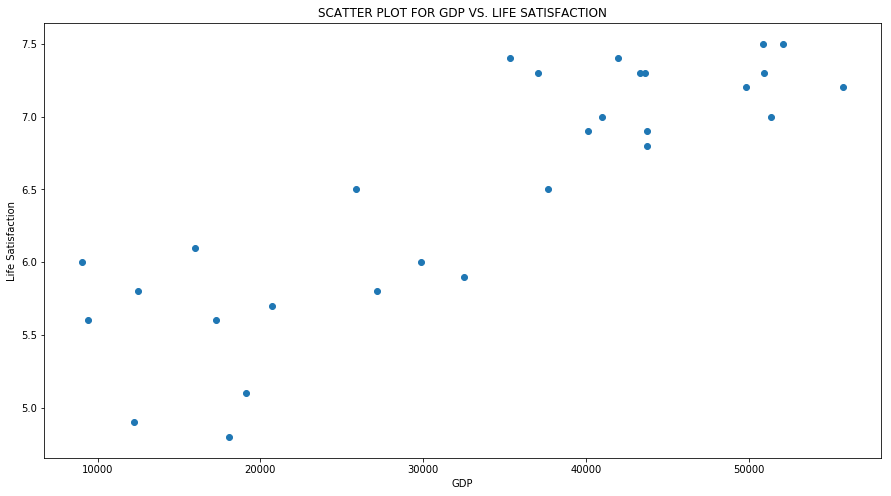

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,8))
plt.scatter(x="GDP per capita", y="Life satisfaction", data=life_sat)
plt.title("SCATTER PLOT FOR GDP VS. LIFE SATISFACTION")
plt.xlabel("GDP")
plt.ylabel("Life Satisfaction")
plt.show()

In [22]:
import seaborn as sns

sns.regplot(x="GDP per capita", y="Life satisfaction", data=life_sat)
plt.title("SCATTER PLOT FOR GDP VS. LIFE SATISFACTION")
plt.xlabel("GDP")
plt.ylabel("Life Satisfaction")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [31]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.c_[life_sat["GDP per capita"]]
y = np.c_[life_sat["Life satisfaction"]]
clf = LinearRegression()

clf = clf.fit(X, y)

predict = clf.predict([[22587]])

print(predict)

[[5.96242338]]


In [36]:
#Using K Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

clf_k = KNeighborsRegressor(n_neighbors=3)

clf_k = clf.fit(X,y)
predict_k = clf_k.predict([[22587]])

print(predict_k)

[[5.96242338]]
